In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
#we should convert characters into numeric values
cols = ["sex"]   # avoid using list as a variable name
df[cols] = df[cols].replace({"male": 1, "female": 2})
df
cols = ["smoker"]   # avoid using list as a variable name
df[cols] = df[cols].replace({"yes": 1, "no": 2})
df
cols = ["region"]   # avoid using list as a variable name
df[cols] = df[cols].replace({"southwest": 10, "southeast": 20,"northwest":30,"northeast":40})
df

C:\Users\SANJEEV\AppData\Local\Temp\ipykernel_28944\2746933257.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[cols] = df[cols].replace({"southwest": 10, "southeast": 20,"northwest":30,"northeast":40})


,age,sex,bmi,children,smoker,region,charges
0,19,2,27.900,0,1,10,16884.92400
1,18,1,33.770,1,2,20,1725.55230
2,28,1,33.000,3,2,20,4449.46200
3,33,1,22.705,0,2,30,21984.47061
4,32,1,28.880,0,2,30,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,2,30,10600.54830
1334,18,2,31.920,0,2,40,2205.98080
1335,18,2,36.850,0,2,20,1629.83350
1336,21,2,25.800,0,2,10,2007.94500


In [11]:
#since price is like 10000 , model cannot predict correctly for that correctly for that use standardization method

from sklearn.preprocessing import StandardScaler

In [12]:
scalar = StandardScaler()

In [13]:
list1 = ['charges']

In [14]:
df[list1] = scalar.fit_transform(df[list1])
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,2,27.900,0,1,10,0.298584
1,18,1,33.770,1,2,20,-0.953689
2,28,1,33.000,3,2,20,-0.728675
3,33,1,22.705,0,2,30,0.719843
4,32,1,28.880,0,2,30,-0.776802


In [15]:
#find correlation 
corr = df.corr()
corr

,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.020856,0.109272,0.042469,0.025019,-0.002127,0.299008
sex,0.020856,1.000000,-0.046371,-0.017163,0.076185,0.004588,-0.057292
bmi,0.109272,-0.046371,1.000000,0.012759,-0.003750,-0.157566,0.198341
children,0.042469,-0.017163,0.012759,1.000000,-0.007673,-0.016569,0.067998
smoker,0.025019,0.076185,-0.003750,-0.007673,1.000000,-0.002181,-0.787251
region,-0.002127,0.004588,-0.157566,-0.016569,-0.002181,1.000000,0.006208
charges,0.299008,-0.057292,0.198341,0.067998,-0.787251,0.006208,1.000000


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

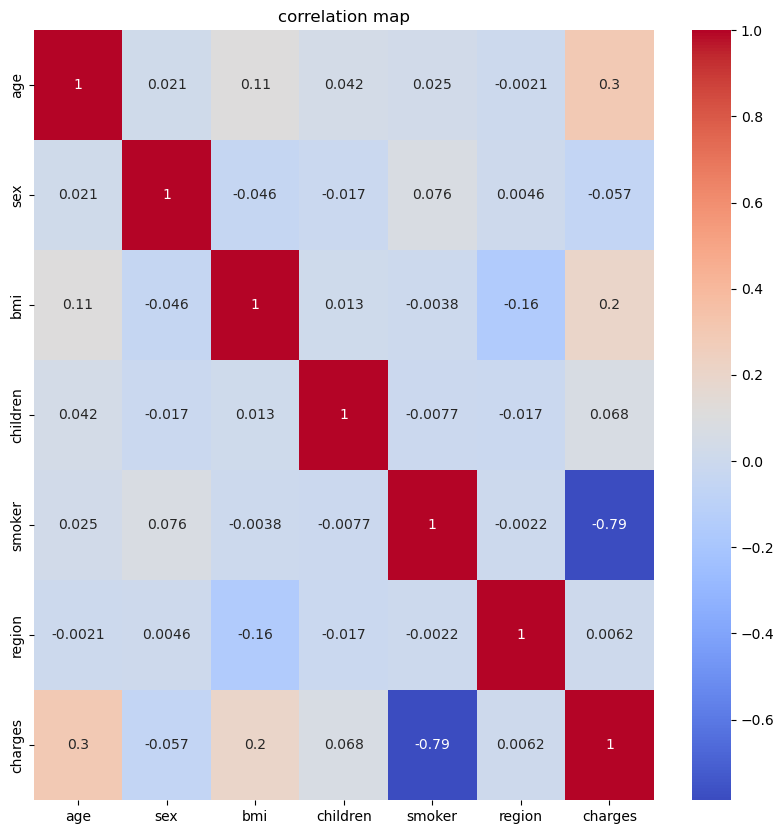

In [17]:
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot = True , cmap = 'coolwarm')
plt.title('correlation map')
plt.show()

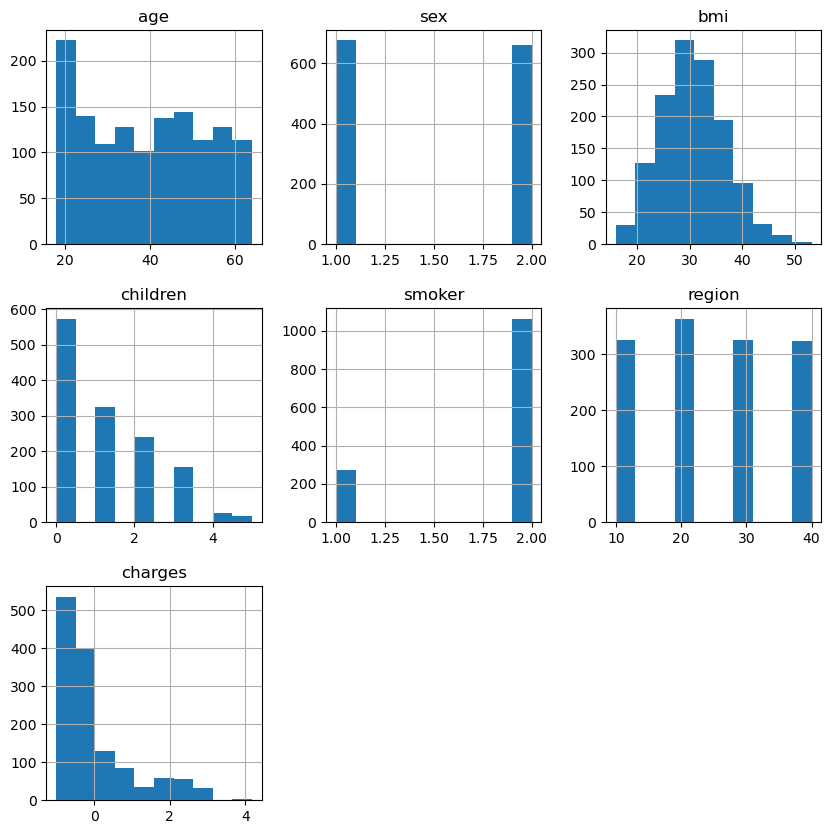

In [18]:
#histogram is used to see the grap for seperate column
df.hist(figsize=(10,10), bins= 10)
plt.show()

In [19]:
x = df.drop('charges', axis = 1)
y = df['charges']

In [20]:
x.head()

,age,sex,bmi,children,smoker,region
0,19,2,27.900,0,1,10
1,18,1,33.770,1,2,20
2,28,1,33.000,3,2,20
3,33,1,22.705,0,2,30
4,32,1,28.880,0,2,30


In [21]:
y.head()

0    0.298584
1   -0.953689
2   -0.728675
3    0.719843
4   -0.776802
Name: charges, dtype: float64

In [22]:
#split the data into test-train-split
from sklearn.model_selection import train_test_split

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

In [24]:
x_train.head()

,age,sex,bmi,children,smoker,region
560,46,2,19.95,2,2,30
1285,47,2,24.32,0,2,40
1142,52,2,24.86,0,2,20
969,39,2,34.32,5,2,20
486,54,2,21.47,3,2,30


In [25]:
x_test

,age,sex,bmi,children,smoker,region
764,45,2,25.175,2,2,40
887,36,2,30.020,0,2,30
890,64,2,26.885,0,1,30
1293,46,1,25.745,3,2,30
259,19,1,31.920,0,1,30
...,...,...,...,...,...,...
109,63,1,35.090,0,1,20
575,58,2,27.170,0,2,30
535,38,1,28.025,1,2,40
543,54,2,47.410,0,1,20


In [26]:
y_train

560    -0.336755
1285   -0.391207
1142    1.143909
969    -0.386072
486    -0.065679
          ...   
1095   -0.719445
1130   -0.387272
1294   -0.110636
860     2.713075
1126   -0.252430
Name: charges, Length: 1070, dtype: float64

In [27]:
y_test

764    -0.344914
887    -0.660713
890     1.326718
1293   -0.327829
259     1.691784
          ...   
109     2.790893
575    -0.086533
535    -0.595044
543     4.171663
846    -0.280676
Name: charges, Length: 268, dtype: float64

In [28]:
#select model
from sklearn.linear_model import LinearRegression

In [29]:
model = LinearRegression()
model

LinearRegression()

In [30]:
model.fit(x_train, y_train)

LinearRegression()

In [31]:
#now test the the data
y_pred = model.predict(x_test)

In [32]:
#using r2 score value
from sklearn.metrics import r2_score

In [33]:
model_1 = r2_score(y_test, y_pred)*100
model_1

78.33463107364538

In [34]:
"""test r2 or cross validation score: it splits your data into multiple parts , trains the model 
on some folds and test it on the remaining fold --repeating this process to get more reliable performance
estimate
"""
from sklearn.model_selection import cross_val_score

In [35]:
charges = cross_val_score(model,x,y, cv=10,scoring = 'r2')
print("r2 score for each fold:", charges)
print("Average r2 scors:",charges.mean())

r2 score for each fold: [0.78522549 0.73213924 0.73490618 0.67241306 0.7716613  0.78358383
 0.79318159 0.67054582 0.74216232 0.76222839]
Average r2 scors: 0.7448047213193172


In [ ]:
#since the rw2 sco and average r2 score value are same so finally confirmed that this is a good model